In [ ]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df= pd.read_csv("car_crashes")
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<AxesSubplot:xlabel='alcohol', ylabel='total'>

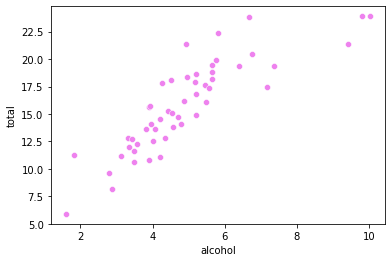

In [8]:
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="violet", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

****************************Variables Dependientes e Independientes***************************

In [10]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#2 Factores como variable independiente
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['alcohol']]
Var_Dep= df['total']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
type(model)

In [33]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

$$
total= 2.0325063 \cdot alcohol + 5.857776154826299

$$

****************************Modelo predictivo***************************

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['alcohol']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
#sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [34]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model.score(X=Vars_Indep, y=Var_Dep)

0.7269492966665405